# Ejercicio 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from tabulate import tabulate
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
x_train = pd.read_csv("mnist_Xtrain.csv", header=None).to_numpy()
y_train = pd.read_csv("mnist_Ytrain.csv", header=None).to_numpy()
x_test = pd.read_csv("mnist_Xtest.csv", header=None).to_numpy()
y_test = pd.read_csv("mnist_Ytest.csv", header=None).to_numpy()

# crear la matriz indicadora Y
lb = LabelBinarizer()
Y_train = lb.fit_transform(y_train)
Y_test = lb.transform(y_test)

# crear la matriz de características X
X_train = np.array(x_train)
X_test = np.array(x_test)

### CART

In [10]:
# Parametros de búsqueda
param_grid = {'ccp_alpha': [0.001, 0.01, 0.1, 1.0]}


clf = DecisionTreeClassifier(random_state=42)
GS_cart = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, n_jobs=-1)
GS_cart.fit(X_train, y_train)

print('best estimator:', GS_cart.best_estimator_)
print('best score:', GS_cart.best_score_)

best estimator: DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
best score: 0.7881


In [11]:
scores_mean = GS_cart.cv_results_['mean_test_score']
scores_sd = GS_cart.cv_results_['std_test_score']
scores_mean_tr = GS_cart.cv_results_['mean_train_score']
scores_sd_tr = GS_cart.cv_results_['std_train_score']

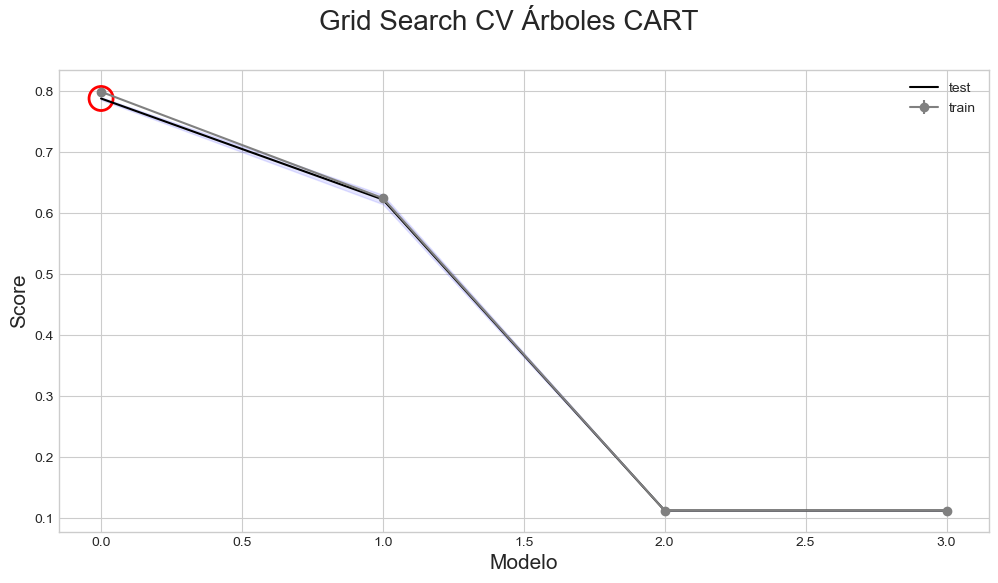

In [14]:
plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd, alpha=0.1, color='blue')
plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),], s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray', ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV Árboles CART',size=20)
plt.legend(loc="best")
plt.show()

In [18]:
clf = GS_cart.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Precisión: 0.7998


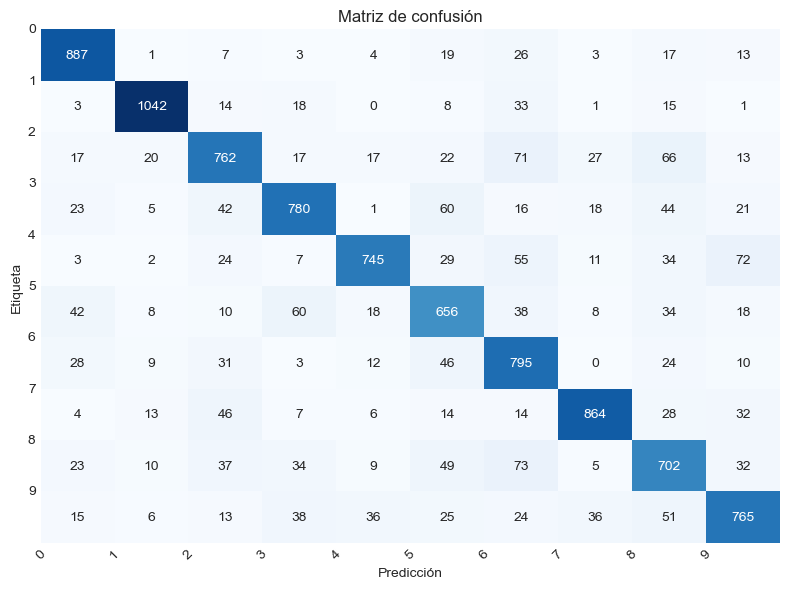

In [28]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [32]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, y_pred)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.85        &     0.91 &       0.88 &     980   \\
 1        & 0.93        &     0.92 &       0.93 &    1135   \\
 2        & 0.77        &     0.74 &       0.76 &    1032   \\
 3        & 0.81        &     0.77 &       0.79 &    1010   \\
 4        & 0.88        &     0.76 &       0.81 &     982   \\
 5        & 0.71        &     0.74 &       0.72 &     892   \\
 6        & 0.69        &     0.83 &       0.76 &     958   \\
 7        & 0.89        &     0.84 &       0.86 &    1028   \\
 8        & 0.69        &     0.72 &       0.71 &     974   \\
 9        & 0.78        &     0.76 &       0.77 &    1009   \\
 accuracy & 0.80        & 10000    &            &           \\
 macro    & avg         &     0.8  &       0.8  &       0.8 \\
 weighted & avg         &     0.8  &       0.8  &       0.8 \\
\hline
\end{tabular}


### AdaBoost

In [52]:
# Parametros de búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
y_train = y_train.ravel()
y_test = y_test.ravel()

adaBoost = AdaBoostClassifier(random_state=42)


GS_ada = GridSearchCV(adaBoost, param_grid, cv=5, return_train_score=True, n_jobs=-1)
GS_ada.fit(X_train, y_train)

best_estimator = GS_ada.best_estimator_
best_score = GS_ada.best_score_

# Imprimir los mejores resultados
print('Best estimator:', best_estimator)
print('Best score:', best_score)

Best estimator: AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)
Best score: 0.8023833333333334


In [53]:
scores_mean = GS_ada.cv_results_['mean_test_score']
scores_sd = GS_ada.cv_results_['std_test_score']
scores_mean_tr = GS_ada.cv_results_['mean_train_score']
scores_sd_tr = GS_ada.cv_results_['std_train_score']

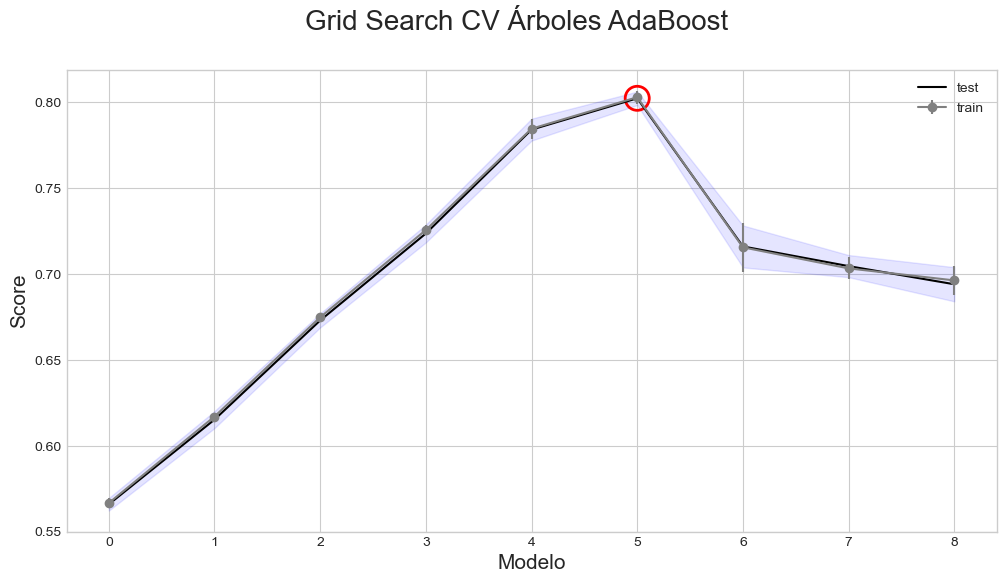

In [59]:
plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd, alpha=0.1, color='blue')
plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),], s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray', ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV Árboles AdaBoost',size=20)
plt.legend(loc="best")
plt.show()

In [55]:
adaBoost = GS_ada.best_estimator_
adaBoost.fit(X_train, y_train)
y_pred = adaBoost.predict(X_test)

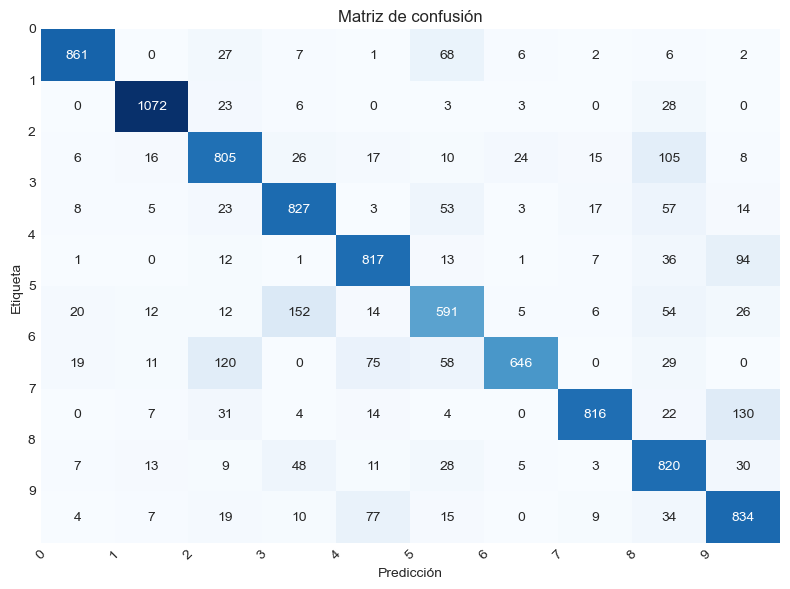

In [56]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [57]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, y_pred)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.93        &     0.88 &       0.9  &    980    \\
 1        & 0.94        &     0.94 &       0.94 &   1135    \\
 2        & 0.74        &     0.78 &       0.76 &   1032    \\
 3        & 0.77        &     0.82 &       0.79 &   1010    \\
 4        & 0.79        &     0.83 &       0.81 &    982    \\
 5        & 0.70        &     0.66 &       0.68 &    892    \\
 6        & 0.93        &     0.67 &       0.78 &    958    \\
 7        & 0.93        &     0.79 &       0.86 &   1028    \\
 8        & 0.69        &     0.84 &       0.76 &    974    \\
 9        & 0.73        &     0.83 &       0.78 &   1009    \\
 accuracy & 0.81        & 10000    &            &           \\
 macro    & avg         &     0.82 &       0.81 &      0.81 \\
 weighted & avg         &     0.82 &       0.81 &      0.81 \\
\hline
\end{tabular}


### Bagging

In [61]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=42)

# Realizar la búsqueda de cuadrícula
GS_bagg = GridSearchCV(bagging, param_grid, cv=5, return_train_score=True, n_jobs=-1)
GS_bagg.fit(X_train, y_train)

# Obtener los mejores resultados
best_estimator = GS_bagg.best_estimator_
best_score = GS_bagg.best_score_

# Imprimir los mejores resultados
print('Best estimator:', best_estimator)
print('Best score:', best_score)

Best estimator: BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  n_estimators=100, random_state=42)
Best score: 0.9652666666666665


In [62]:
scores_mean = GS_bagg.cv_results_['mean_test_score']
scores_sd = GS_bagg.cv_results_['std_test_score']
scores_mean_tr = GS_bagg.cv_results_['mean_train_score']
scores_sd_tr = GS_bagg.cv_results_['std_train_score']

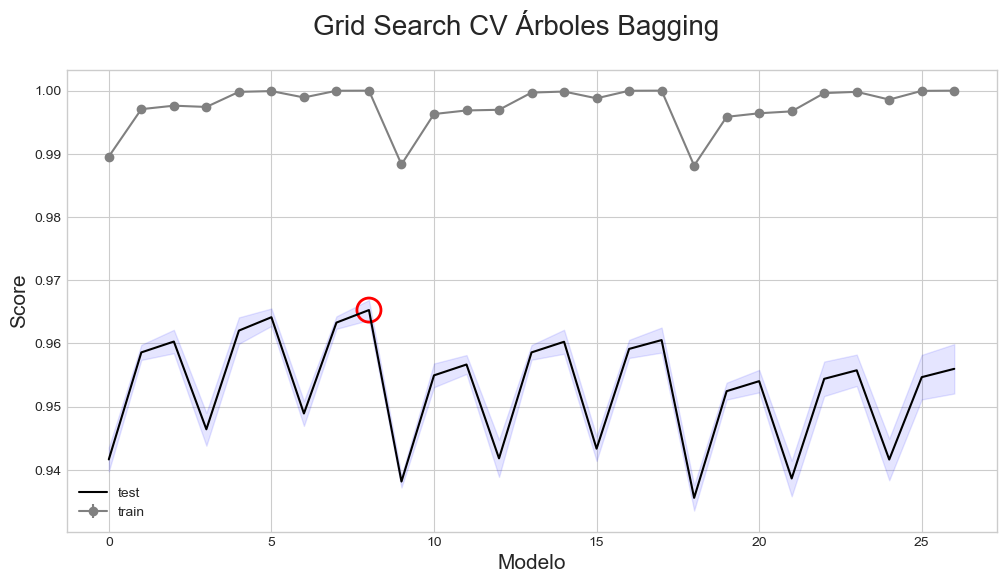

In [63]:
plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd, alpha=0.1, color='blue')
plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),], s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray', ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV Árboles Bagging',size=20)
plt.legend(loc="best")
plt.show()

In [64]:
bagging = GS_bagg.best_estimator_
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

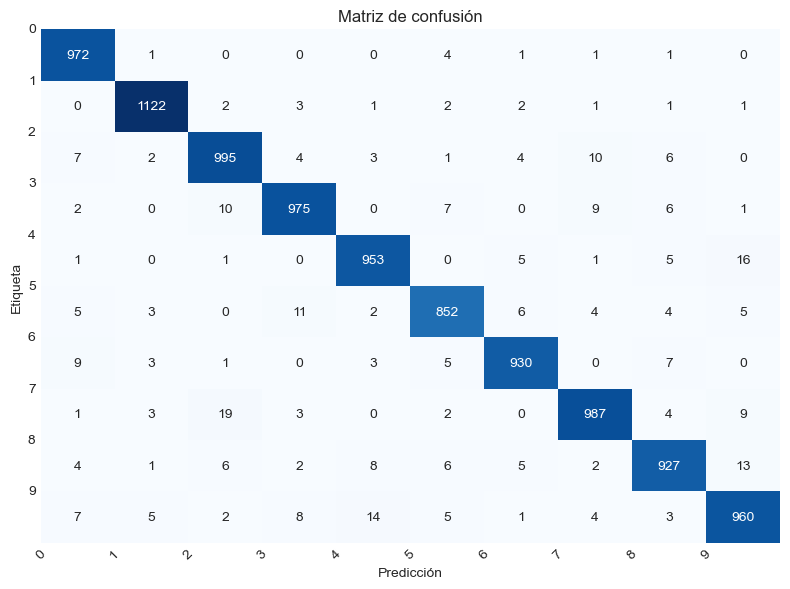

In [65]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [66]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, y_pred)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.96        &     0.99 &       0.98 &    980    \\
 1        & 0.98        &     0.99 &       0.99 &   1135    \\
 2        & 0.96        &     0.96 &       0.96 &   1032    \\
 3        & 0.97        &     0.97 &       0.97 &   1010    \\
 4        & 0.97        &     0.97 &       0.97 &    982    \\
 5        & 0.96        &     0.96 &       0.96 &    892    \\
 6        & 0.97        &     0.97 &       0.97 &    958    \\
 7        & 0.97        &     0.96 &       0.96 &   1028    \\
 8        & 0.96        &     0.95 &       0.96 &    974    \\
 9        & 0.96        &     0.95 &       0.95 &   1009    \\
 accuracy & 0.97        & 10000    &            &           \\
 macro    & avg         &     0.97 &       0.97 &      0.97 \\
 weighted & avg         &     0.97 &       0.97 &      0.97 \\
\hline
\end{tabular}


### Random Forest

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10]
}

# Crear un clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

GS_rf = GridSearchCV(rf, param_grid, cv=5, return_train_score=True, n_jobs=-1)
GS_rf.fit(X_train, y_train)

# Obtener los mejores resultados
best_estimator = GS_rf.best_estimator_
best_score = GS_rf.best_score_

# Imprimir los mejores resultados
print('Best estimator:', best_estimator)
print('Best score:', best_score)


Best estimator: RandomForestClassifier(n_estimators=300, random_state=42)
Best score: 0.9685333333333332


In [14]:
scores_mean = GS_rf.cv_results_['mean_test_score']
scores_sd = GS_rf.cv_results_['std_test_score']
scores_mean_tr = GS_rf.cv_results_['mean_train_score']
scores_sd_tr = GS_rf.cv_results_['std_train_score']

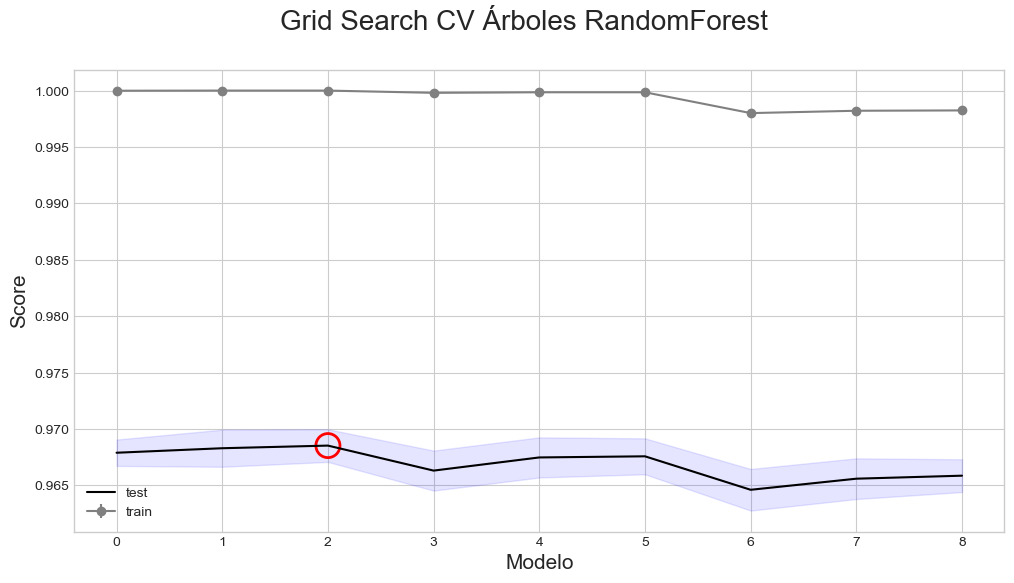

In [15]:
plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd, alpha=0.1, color='blue')
plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),], s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray', ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV Árboles RandomForest',size=20)
plt.legend(loc="best")
plt.show()

In [19]:
rf = GS_rf.best_estimator_
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

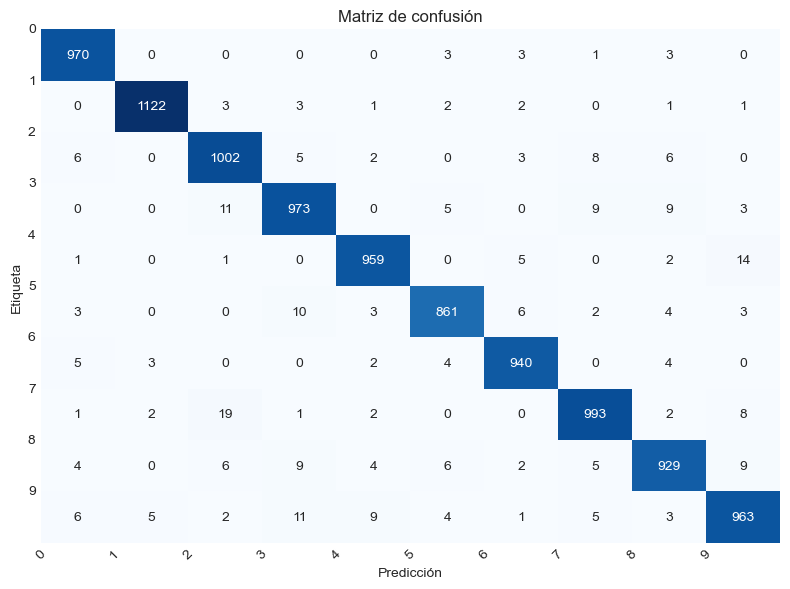

In [17]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [18]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, y_pred)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.97        &     0.99 &       0.98 &    980    \\
 1        & 0.99        &     0.99 &       0.99 &   1135    \\
 2        & 0.96        &     0.97 &       0.97 &   1032    \\
 3        & 0.96        &     0.96 &       0.96 &   1010    \\
 4        & 0.98        &     0.98 &       0.98 &    982    \\
 5        & 0.97        &     0.97 &       0.97 &    892    \\
 6        & 0.98        &     0.98 &       0.98 &    958    \\
 7        & 0.97        &     0.97 &       0.97 &   1028    \\
 8        & 0.96        &     0.95 &       0.96 &    974    \\
 9        & 0.96        &     0.95 &       0.96 &   1009    \\
 accuracy & 0.97        & 10000    &            &           \\
 macro    & avg         &     0.97 &       0.97 &      0.97 \\
 weighted & avg         &     0.97 &       0.97 &      0.97 \\
\hline
\end{tabular}


### Redes Neuronales

In [8]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [9]:
nn = MLPClassifier(alpha=0.01, hidden_layer_sizes=(100), max_iter=100, solver='adam')
nn.fit(X_train, y_train)
nn_predictions = nn.predict(X_test)

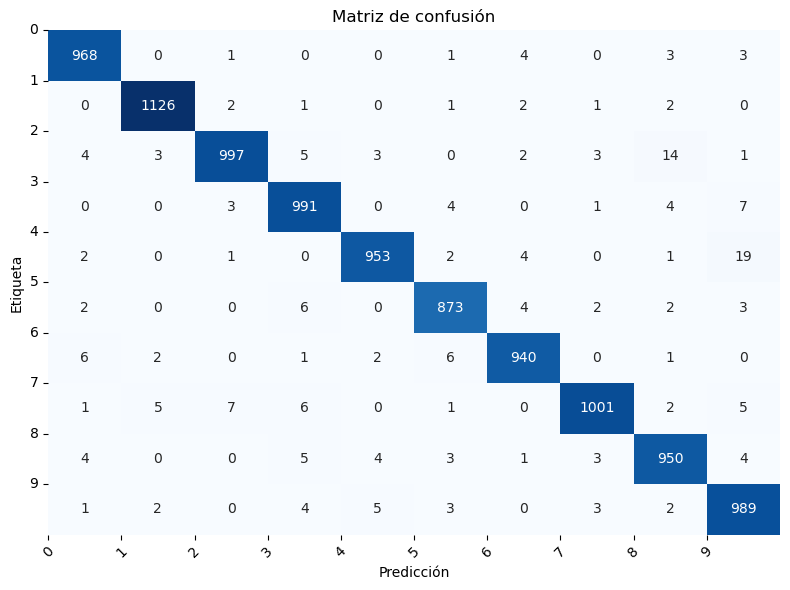

In [10]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, nn_predictions)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [11]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, nn_predictions)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.98        &     0.99 &       0.98 &    980    \\
 1        & 0.99        &     0.99 &       0.99 &   1135    \\
 2        & 0.99        &     0.97 &       0.98 &   1032    \\
 3        & 0.97        &     0.98 &       0.98 &   1010    \\
 4        & 0.99        &     0.97 &       0.98 &    982    \\
 5        & 0.98        &     0.98 &       0.98 &    892    \\
 6        & 0.98        &     0.98 &       0.98 &    958    \\
 7        & 0.99        &     0.97 &       0.98 &   1028    \\
 8        & 0.97        &     0.98 &       0.97 &    974    \\
 9        & 0.96        &     0.98 &       0.97 &   1009    \\
 accuracy & 0.98        & 10000    &            &           \\
 macro    & avg         &     0.98 &       0.98 &      0.98 \\
 weighted & avg         &     0.98 &       0.98 &      0.98 \\
\hline
\end{tabular}


### SVM

In [92]:
svm = SVC(C=1, gamma=0.01, random_state=42)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

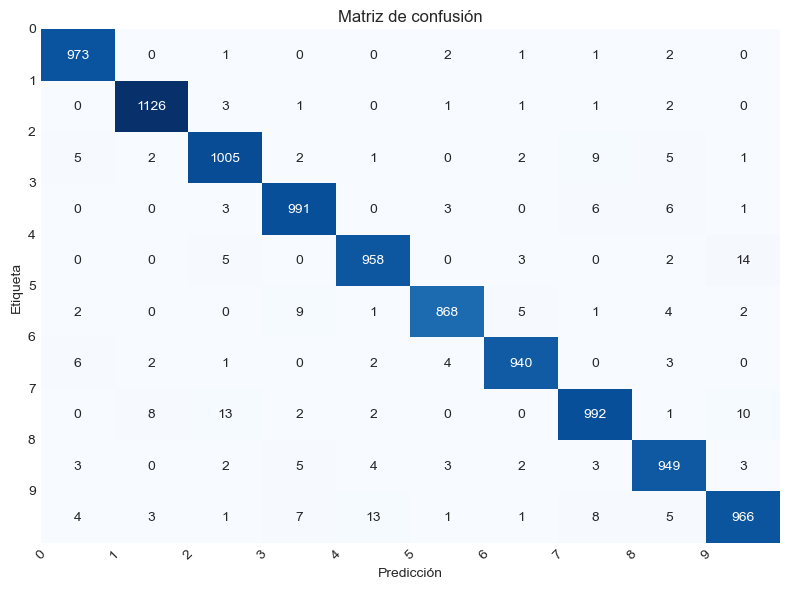

In [93]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, svm_predictions)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [94]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, svm_predictions)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.98        &     0.99 &       0.99 &    980    \\
 1        & 0.99        &     0.99 &       0.99 &   1135    \\
 2        & 0.97        &     0.97 &       0.97 &   1032    \\
 3        & 0.97        &     0.98 &       0.98 &   1010    \\
 4        & 0.98        &     0.98 &       0.98 &    982    \\
 5        & 0.98        &     0.97 &       0.98 &    892    \\
 6        & 0.98        &     0.98 &       0.98 &    958    \\
 7        & 0.97        &     0.96 &       0.97 &   1028    \\
 8        & 0.97        &     0.97 &       0.97 &    974    \\
 9        & 0.97        &     0.96 &       0.96 &   1009    \\
 accuracy & 0.98        & 10000    &            &           \\
 macro    & avg         &     0.98 &       0.98 &      0.98 \\
 weighted & avg         &     0.98 &       0.98 &      0.98 \\
\hline
\end{tabular}


### Regresión Lineal

In [104]:
reg = LinearRegression().fit(X_train, Y_train)
Y_test = np.zeros((len(y_test), 10))
Y_test[np.arange(len(y_test)), y_test] = 1
y_pred = reg.predict(X_test)
linr_predictions = np.argmax(y_pred, axis=1)

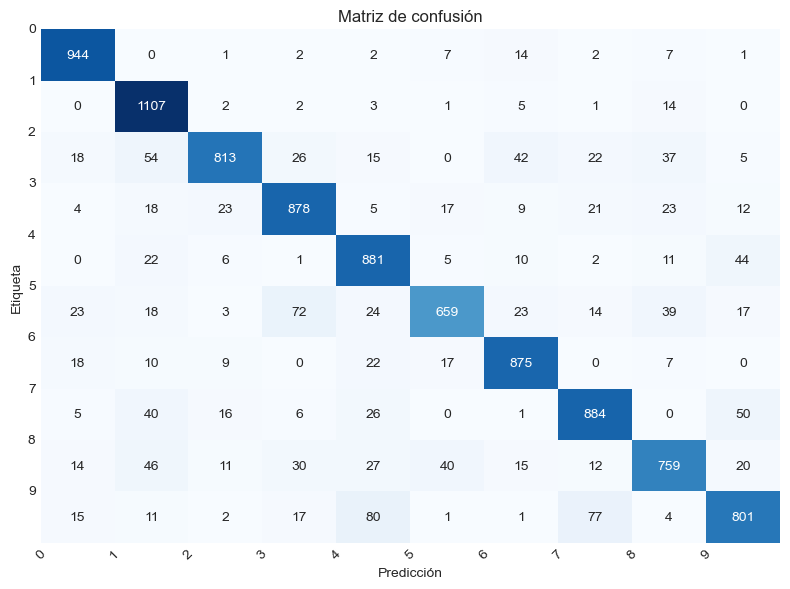

In [105]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [106]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, linr_predictions)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.91        &     0.96 &       0.93 &    980    \\
 1        & 0.83        &     0.98 &       0.9  &   1135    \\
 2        & 0.92        &     0.79 &       0.85 &   1032    \\
 3        & 0.85        &     0.87 &       0.86 &   1010    \\
 4        & 0.81        &     0.9  &       0.85 &    982    \\
 5        & 0.88        &     0.74 &       0.8  &    892    \\
 6        & 0.88        &     0.91 &       0.9  &    958    \\
 7        & 0.85        &     0.86 &       0.86 &   1028    \\
 8        & 0.84        &     0.78 &       0.81 &    974    \\
 9        & 0.84        &     0.79 &       0.82 &   1009    \\
 accuracy & 0.86        & 10000    &            &           \\
 macro    & avg         &     0.86 &       0.86 &      0.86 \\
 weighted & avg         &     0.86 &       0.86 &      0.86 \\
\hline
\end{tabular}


### LDA

In [107]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

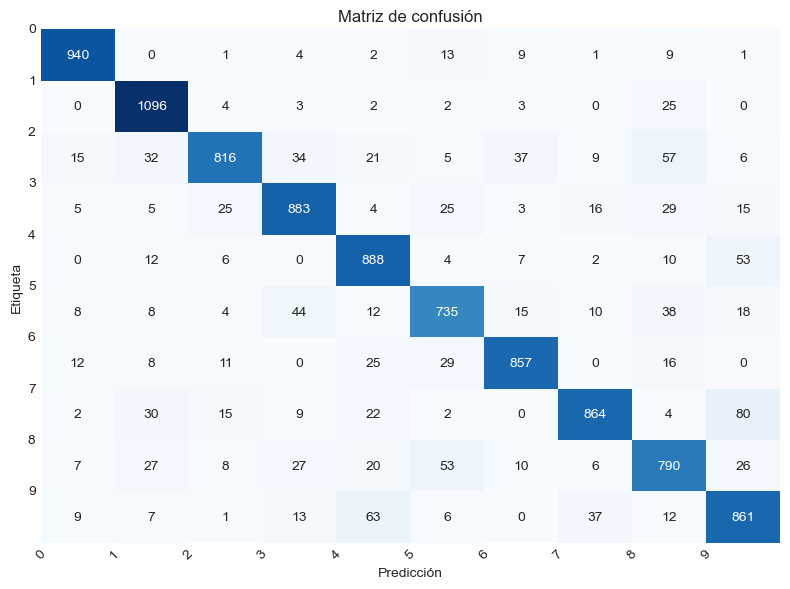

In [108]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred_lda)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [109]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, y_pred_lda)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.94        &     0.96 &       0.95 &    980    \\
 1        & 0.89        &     0.97 &       0.93 &   1135    \\
 2        & 0.92        &     0.79 &       0.85 &   1032    \\
 3        & 0.87        &     0.87 &       0.87 &   1010    \\
 4        & 0.84        &     0.9  &       0.87 &    982    \\
 5        & 0.84        &     0.82 &       0.83 &    892    \\
 6        & 0.91        &     0.89 &       0.9  &    958    \\
 7        & 0.91        &     0.84 &       0.88 &   1028    \\
 8        & 0.80        &     0.81 &       0.8  &    974    \\
 9        & 0.81        &     0.85 &       0.83 &   1009    \\
 accuracy & 0.87        & 10000    &            &           \\
 macro    & avg         &     0.87 &       0.87 &      0.87 \\
 weighted & avg         &     0.87 &       0.87 &      0.87 \\
\hline
\end{tabular}


### QDA

In [110]:
# entrenar un clasificador QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

C:\Users\David\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


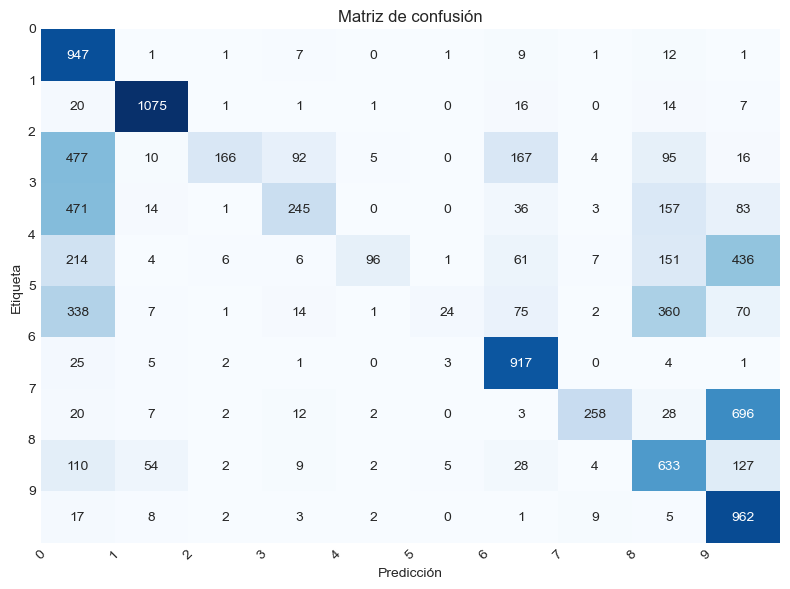

In [111]:
# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred_qda)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [112]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, y_pred_qda)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.36        &     0.97 &       0.52 &    980    \\
 1        & 0.91        &     0.95 &       0.93 &   1135    \\
 2        & 0.90        &     0.16 &       0.27 &   1032    \\
 3        & 0.63        &     0.24 &       0.35 &   1010    \\
 4        & 0.88        &     0.1  &       0.18 &    982    \\
 5        & 0.71        &     0.03 &       0.05 &    892    \\
 6        & 0.70        &     0.96 &       0.81 &    958    \\
 7        & 0.90        &     0.25 &       0.39 &   1028    \\
 8        & 0.43        &     0.65 &       0.52 &    974    \\
 9        & 0.40        &     0.95 &       0.56 &   1009    \\
 accuracy & 0.53        & 10000    &            &           \\
 macro    & avg         &     0.68 &       0.53 &      0.46 \\
 weighted & avg         &     0.69 &       0.53 &      0.47 \\
\hline
\end{tabular}


### Regresión Logística

In [113]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_rlog = lr.predict(X_test)

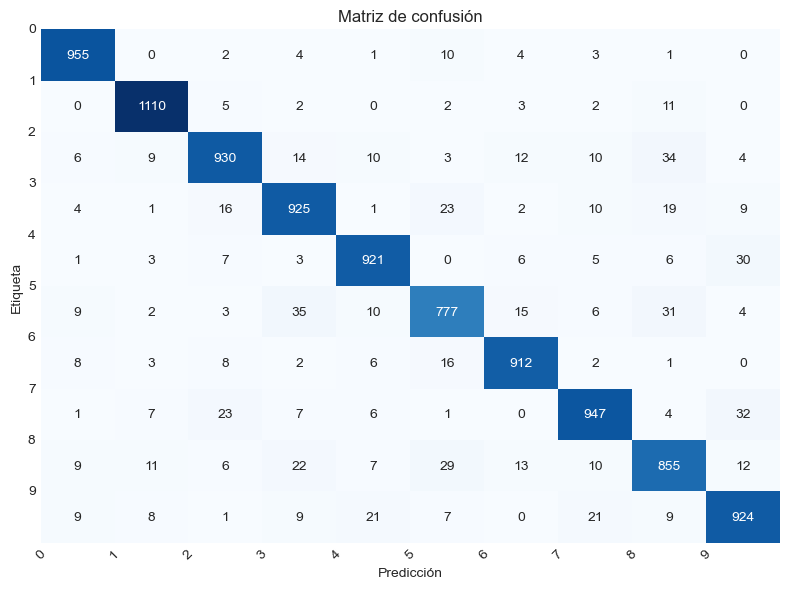

In [114]:
#Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred_rlog)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de calor de la matriz de confusión
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta')
ax.set_title('Matriz de confusión')

# Configurar los ticks de los ejes
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Rotar las etiquetas de los ejes x e y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [115]:
# Obtener el reporte de clasificación
classification_rep = classification_report(y_test, y_pred_rlog)

# Convertir el reporte de clasificación a una lista de listas
classification_rep_list = classification_rep.split('\n')
classification_rep_list = [row.split() for row in classification_rep_list if row]

# Generar el código LaTeX de la tabla
latex_table = tabulate(classification_rep_list, headers='firstrow', tablefmt='latex')

# Imprimir el código LaTeX de la tabla
print(latex_table)

\begin{tabular}{llrrrr}
\hline
          & precision   &   recall &   f1-score &   support \\
\hline
 0        & 0.95        &     0.97 &       0.96 &    980    \\
 1        & 0.96        &     0.98 &       0.97 &   1135    \\
 2        & 0.93        &     0.9  &       0.91 &   1032    \\
 3        & 0.90        &     0.92 &       0.91 &   1010    \\
 4        & 0.94        &     0.94 &       0.94 &    982    \\
 5        & 0.90        &     0.87 &       0.88 &    892    \\
 6        & 0.94        &     0.95 &       0.95 &    958    \\
 7        & 0.93        &     0.92 &       0.93 &   1028    \\
 8        & 0.88        &     0.88 &       0.88 &    974    \\
 9        & 0.91        &     0.92 &       0.91 &   1009    \\
 accuracy & 0.93        & 10000    &            &           \\
 macro    & avg         &     0.92 &       0.92 &      0.92 \\
 weighted & avg         &     0.93 &       0.93 &      0.93 \\
\hline
\end{tabular}
